<a href="https://colab.research.google.com/github/vdat-18/ngvdat/blob/main/Model_and_Analysis_(Tiki).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***`LIBRARIES`***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# ***`EDA (Exploring Data Analysis)`***

In [ ]:
df_copy = pd.read_excel('/content/drive/My Drive/Colab Notebooks/hoan_chinh_1.xlsx')

In [ ]:
df_copy_temp = df_copy.drop(columns = ['id', 'name', 'price', 'rating_average', 'review_count', 'quantity_sold', 'quantity_sold_2weeks', 'product_categories', 'positive_x', 'negative_x', 'revenue_x'])

df_copy_temp['Chat Resopnse'] = df_copy_temp['Chat Resopnse'].replace('No', 0)
df_copy_temp['Followers'] = df_copy_temp['Followers'].astype(int)
df_copy_temp = df_copy_temp.drop_duplicates()
df_copy_temp = shuffle(df_copy_temp).reset_index(drop=True)
df_copy_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   shop_categories  146 non-null    object 
 1   Name_Shop        146 non-null    object 
 2   Shop_Rating      146 non-null    float64
 3   Year_Joined      146 non-null    int64  
 4   Followers        146 non-null    int64  
 5   Chat Resopnse    146 non-null    float64
 6   positive_y       146 non-null    int64  
 7   negative_y       146 non-null    int64  
 8   revenue_y        146 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 10.4+ KB


# ***Describe***

In [ ]:
df_copy_temp.describe()

,Shop_Rating,Year_Joined,Followers,Chat Resopnse,positive_y,negative_y,revenue_y
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,1.460000e+02
mean,4.583562,4.616438,2537.342466,0.509932,508.993151,161.883562,1.975361e+08
std,0.223152,1.355755,3192.418328,0.429035,421.799683,136.882457,5.595206e+08
min,3.500000,1.000000,14.000000,0.000000,2.000000,0.000000,0.000000e+00
25%,4.500000,4.000000,542.750000,0.000000,202.250000,65.500000,4.635250e+06
50%,4.600000,5.000000,1379.500000,0.645000,379.000000,118.000000,1.837360e+07
75%,4.700000,6.000000,3124.000000,0.927500,646.750000,228.500000,7.266900e+07
max,4.900000,7.000000,18047.000000,1.000000,2062.000000,673.000000,3.945204e+09


<ipython-input-7-8c3f9128fc36>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_copy_temp[j], fit = stats.norm)
<ipython-input-7-8c3f9128fc36>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_copy_temp[j], fit = stats.norm)
<ipython-input-7-8c3f9128fc36>:7: UserWarning: 

`distplot` is

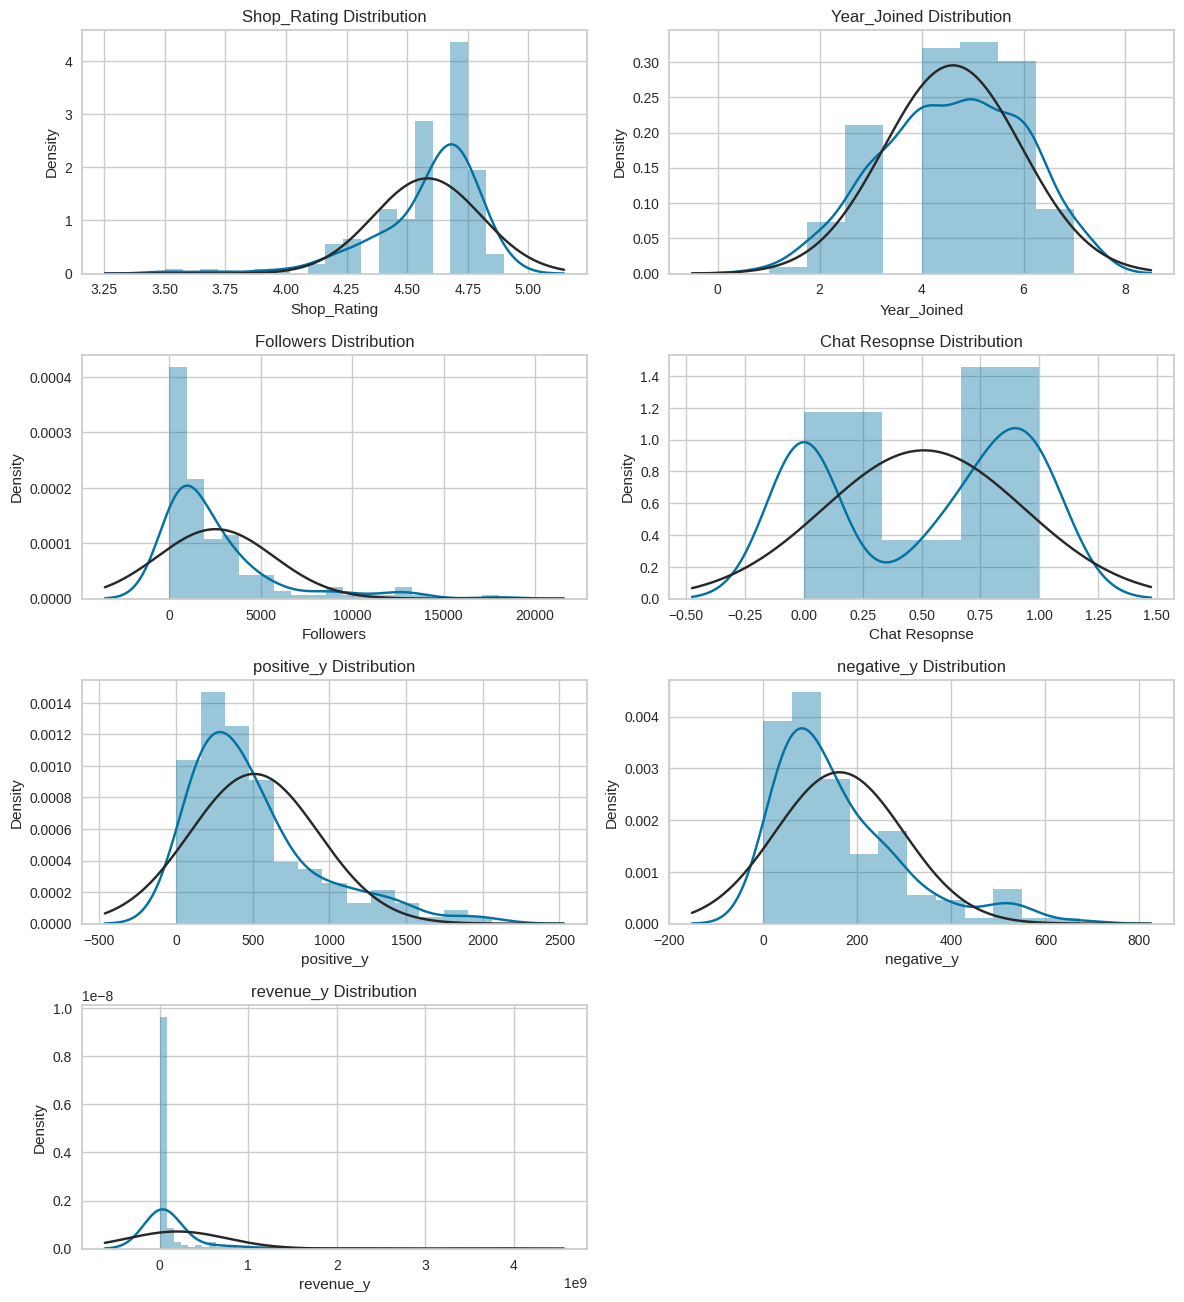

In [ ]:
import scipy.stats as stats

# Visualize the distribution of each variable.
plt.figure(figsize=(12,16))
for i, j in enumerate(df_copy_temp.describe().columns):
    plt.subplot(5,2, i+1)
    sns.distplot(x=df_copy_temp[j], fit = stats.norm)
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    plt.tight_layout()
plt.show()



# ***Outlier***

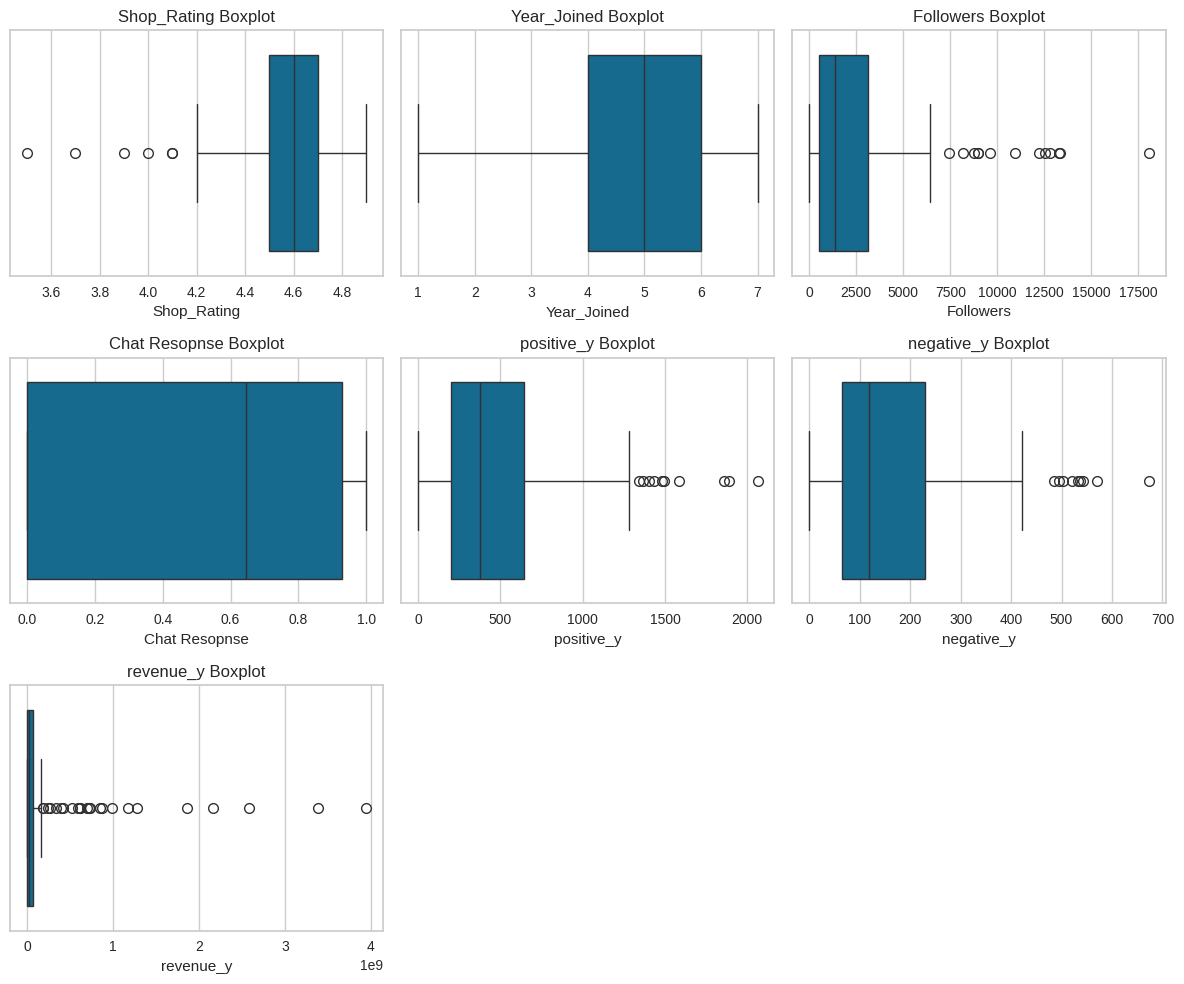

In [ ]:
# Visualize the boxplot of each variable.
plt.figure(figsize=(12,10))
for i, j in enumerate(df_copy_temp.describe().columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=df_copy_temp[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()

plt.show()

In [ ]:

# Hàm để đưa outlier về max hoặc min
def handle_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Đưa outlier về giá trị max nếu nằm phía trên của boxplot
    column[column > upper_bound] = upper_bound

    # Đưa outlier về giá trị min nếu nằm phía dưới của boxplot
    column[column < lower_bound] = lower_bound

# Áp dụng hàm cho từng cột 'Cau1', 'Cau2', 'Cau3', 'Cau4'
for col in ['Shop_Rating',	'Year_Joined',	'Followers',	'Chat Resopnse',	'positive_y',	'negative_y',	'revenue_y']:
    handle_outliers(df_copy_temp[col])




<ipython-input-9-fc5d3f41c011>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > upper_bound] = upper_bound
<ipython-input-9-fc5d3f41c011>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column < lower_bound] = lower_bound
<ipython-input-9-fc5d3f41c011>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > upper_bound] = upper_bound
<ipython-input-9-fc5d3f41c011>:13: SettingWithCopyWarning: 
A value

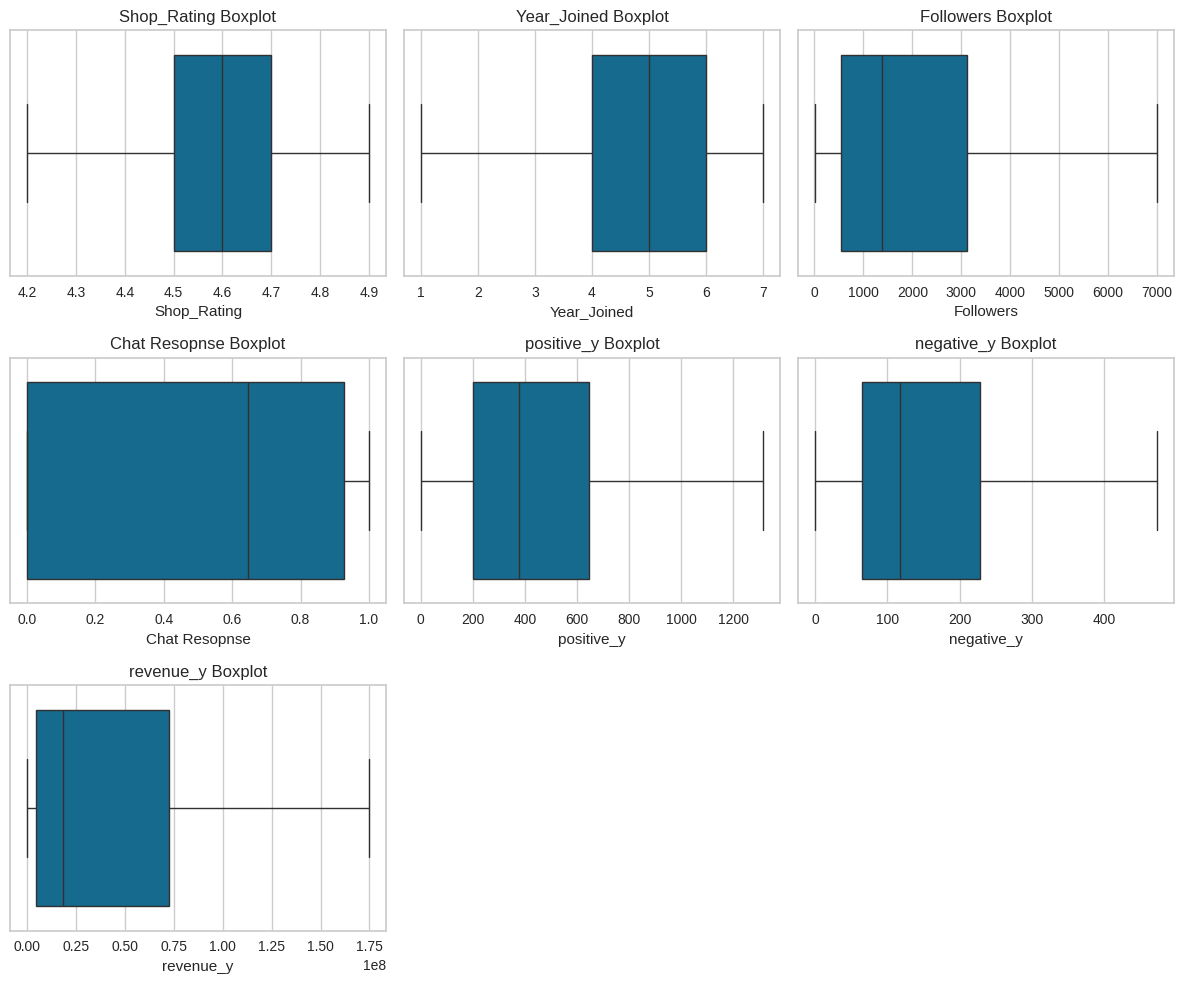

In [ ]:
# Visualize the boxplot of each variable.
plt.figure(figsize=(12,10))
for i, j in enumerate(df_copy_temp.describe().columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=df_copy_temp[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()

plt.show()

# ***Univariate Analysis***

In [ ]:
df_copy_temp.describe()

,Shop_Rating,Year_Joined,Followers,Chat Resopnse,positive_y,negative_y,revenue_y
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,1.460000e+02
mean,4.596575,4.616438,2166.947774,0.509932,489.904110,157.767123,5.070721e+07
std,0.182856,1.355755,2113.713727,0.429035,370.547667,125.251639,6.358666e+07
min,4.200000,1.000000,14.000000,0.000000,2.000000,0.000000,0.000000e+00
25%,4.500000,4.000000,542.750000,0.000000,202.250000,65.500000,4.635250e+06
50%,4.600000,5.000000,1379.500000,0.645000,379.000000,118.000000,1.837360e+07
75%,4.700000,6.000000,3124.000000,0.927500,646.750000,228.500000,7.266900e+07
max,4.900000,7.000000,6995.875000,1.000000,1313.500000,473.000000,1.747196e+08


# ***Log info***

In [ ]:

df_copy_temp_log = df_copy_temp.iloc[:, 2:]
df_copy_temp_log[['Followers', 'positive_y', 'negative_y', 'revenue_y']] = df_copy_temp[['Followers', 'positive_y', 'negative_y', 'revenue_y']].apply(lambda x: np.log(x + 1))
df_copy_temp_log.describe()


,Shop_Rating,Year_Joined,Followers,Chat Resopnse,positive_y,negative_y,revenue_y
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,4.596575,4.616438,7.038880,0.509932,5.833782,4.697130,16.026234
std,0.182856,1.355755,1.342304,0.429035,0.998979,0.986310,3.746058
min,4.200000,1.000000,2.708050,0.000000,1.098612,0.000000,0.000000
25%,4.500000,4.000000,6.298487,0.000000,5.314434,4.197118,15.349020
50%,4.600000,5.000000,7.230199,0.645000,5.940168,4.779123,16.726425
75%,4.700000,6.000000,8.047182,0.927500,6.473467,5.435896,18.100614
max,4.900000,7.000000,8.853219,1.000000,7.181212,6.161207,18.978693


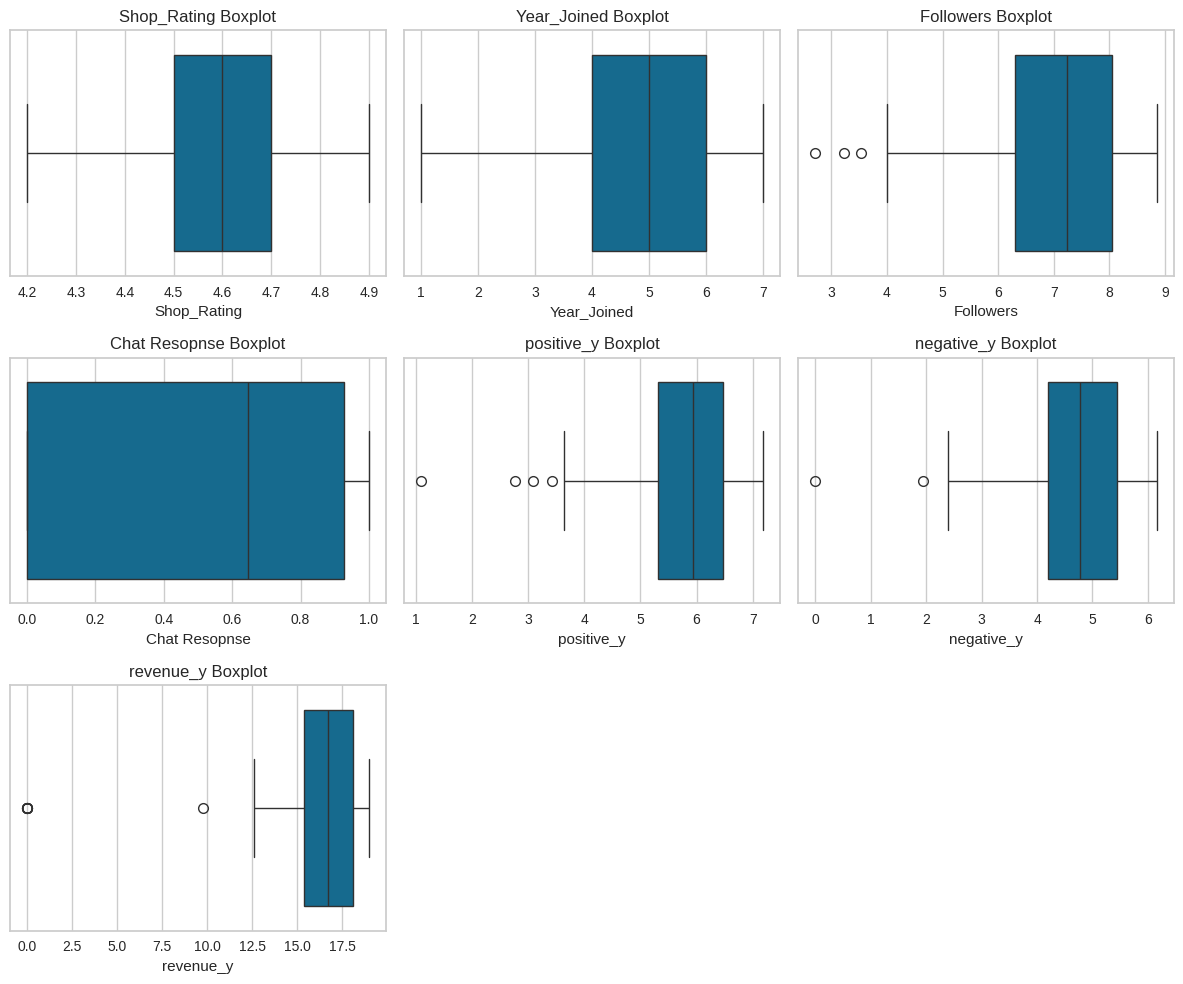

In [ ]:
# Visualize the boxplot of each variable.
plt.figure(figsize=(12,10))
for i, j in enumerate(df_copy_temp_log.describe().columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=df_copy_temp_log[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()

plt.show()

In [ ]:

# Hàm để đưa outlier về max hoặc min
def handle_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Đưa outlier về giá trị max nếu nằm phía trên của boxplot
    column[column > upper_bound] = upper_bound

    # Đưa outlier về giá trị min nếu nằm phía dưới của boxplot
    column[column < lower_bound] = lower_bound

# Áp dụng hàm cho từng cột 'Cau1', 'Cau2', 'Cau3', 'Cau4'
for col in ['Shop_Rating',	'Year_Joined',	'Followers',	'Chat Resopnse',	'positive_y',	'negative_y',	'revenue_y']:
    handle_outliers(df_copy_temp_log[col])




<ipython-input-14-3f412fcae199>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > upper_bound] = upper_bound
<ipython-input-14-3f412fcae199>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column < lower_bound] = lower_bound
<ipython-input-14-3f412fcae199>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > upper_bound] = upper_bound
<ipython-input-14-3f412fcae199>:13: SettingWithCopyWarning: 
A v

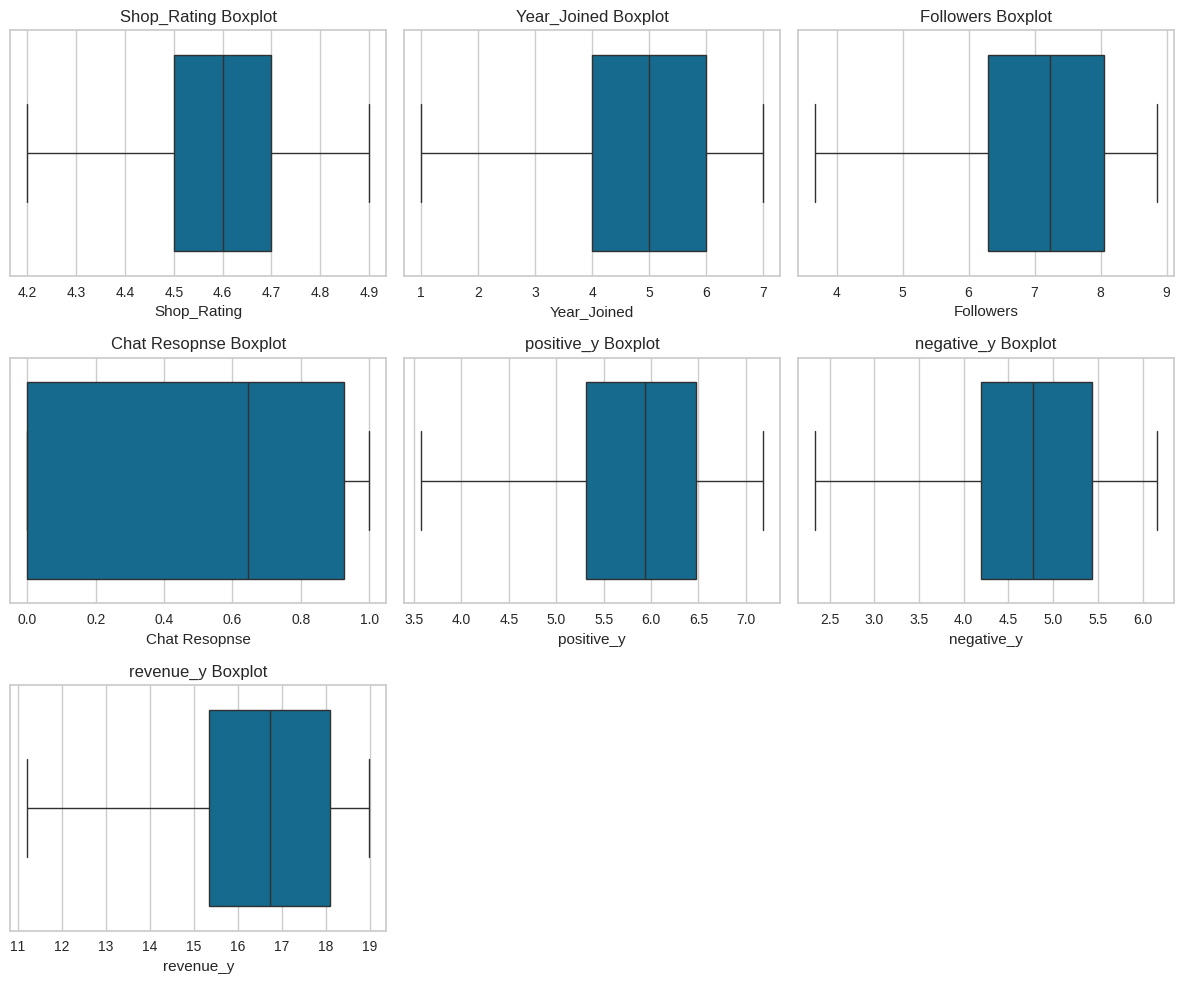

In [ ]:
# Visualize the boxplot of each variable.
plt.figure(figsize=(12,10))
for i, j in enumerate(df_copy_temp_log.describe().columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=df_copy_temp_log[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()

plt.show()

<ipython-input-16-a1bc799bb5a3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_copy_temp_log[j], fit = stats.norm)
<ipython-input-16-a1bc799bb5a3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_copy_temp_log[j], fit = stats.norm)
<ipython-input-16-a1bc799bb5a3>:5: UserWarning: 

`d

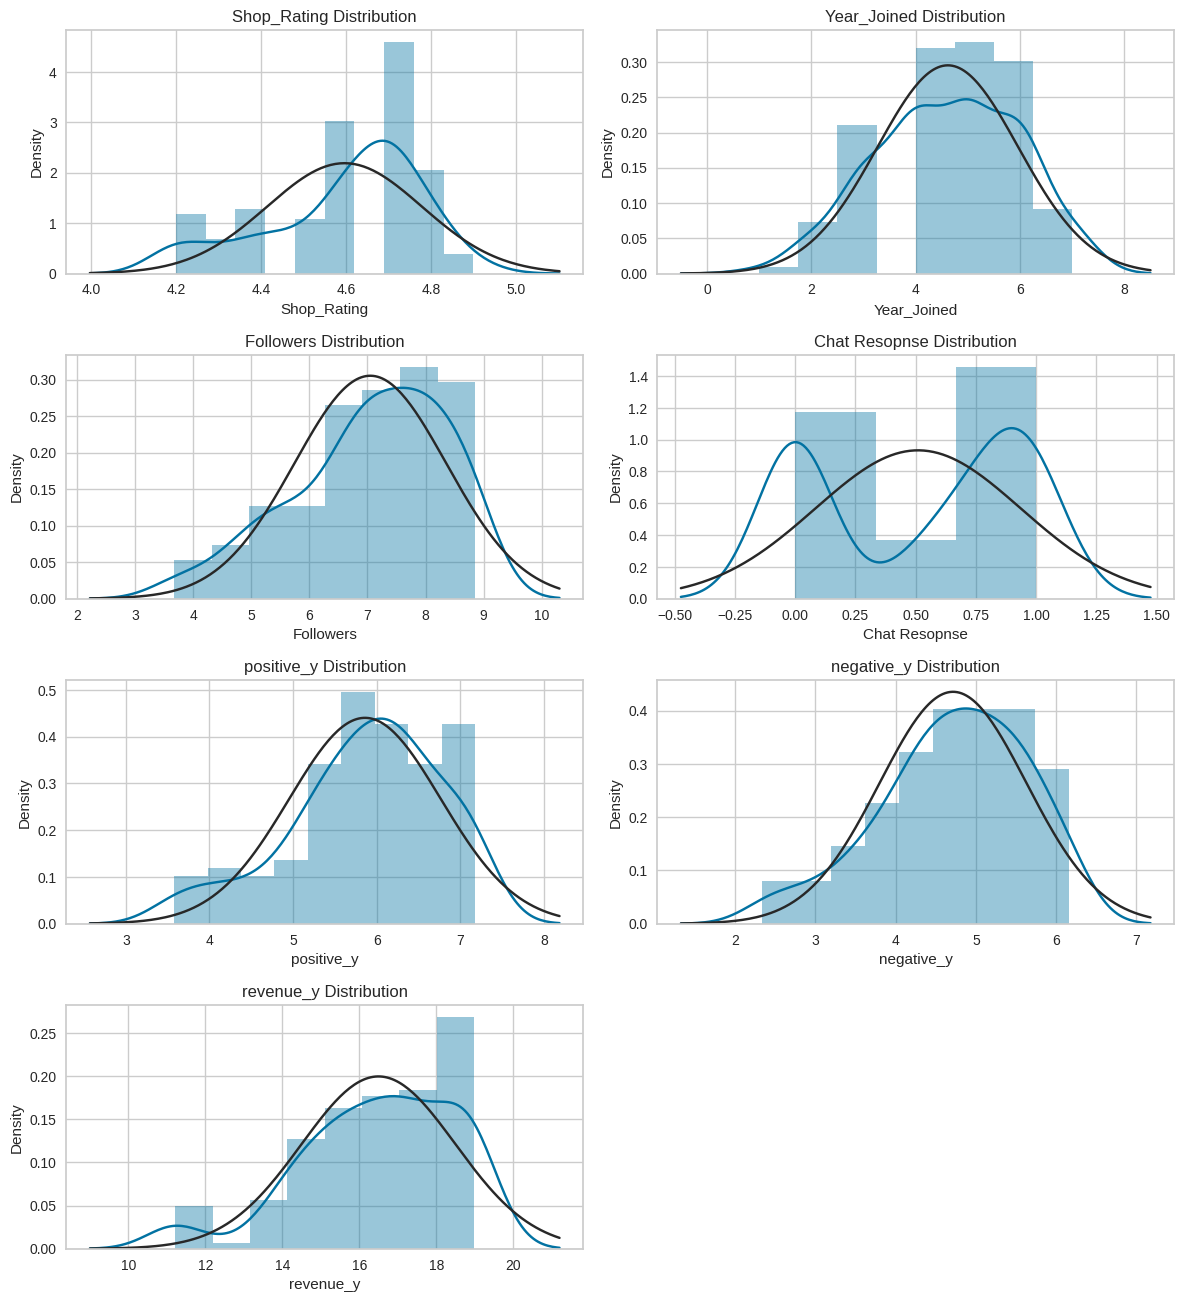

In [ ]:
# Visualize the distribution of each variable.
plt.figure(figsize=(12,16))
for i, j in enumerate(df_copy_temp_log.describe().columns):
    plt.subplot(5,2, i+1)
    sns.distplot(x=df_copy_temp_log[j], fit = stats.norm)
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    plt.tight_layout()
plt.show()


Để áp dụng log thì giá trị trong DataFrame phải khác 0, nếu giá trị bằng 0 sẽ sinh ra các giá trị không xác định (- vô cực)

# ***`StandardScaler`***

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_copy_temp_log)
scaled_df = pd.DataFrame(scaled_df, columns=df_copy_temp_log.columns)



In [ ]:
scaled_df.describe()

,Shop_Rating,Year_Joined,Followers,Chat Resopnse,positive_y,negative_y,revenue_y
count,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02
mean,1.234933e-15,-2.190029e-16,6.083414e-18,2.190029e-16,-2.159612e-16,7.573850e-16,7.543433e-16
std,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00
min,-2.176246e+00,-2.676653e+00,-2.581187e+00,-1.192646e+00,-2.520903e+00,-2.594927e+00,-2.637773e+00
25%,-5.299666e-01,-4.562477e-01,-5.746243e-01,-1.192646e+00,-6.025801e-01,-5.663073e-01,-5.740960e-01
50%,1.879314e-02,2.838875e-01,1.381128e-01,3.159030e-01,8.785717e-02,6.908662e-02,1.145999e-01
75%,5.675529e-01,1.024023e+00,7.630843e-01,9.766241e-01,6.763020e-01,7.861059e-01,8.016884e-01
max,1.665072e+00,1.764158e+00,1.379683e+00,1.146190e+00,1.457231e+00,1.577951e+00,1.240724e+00


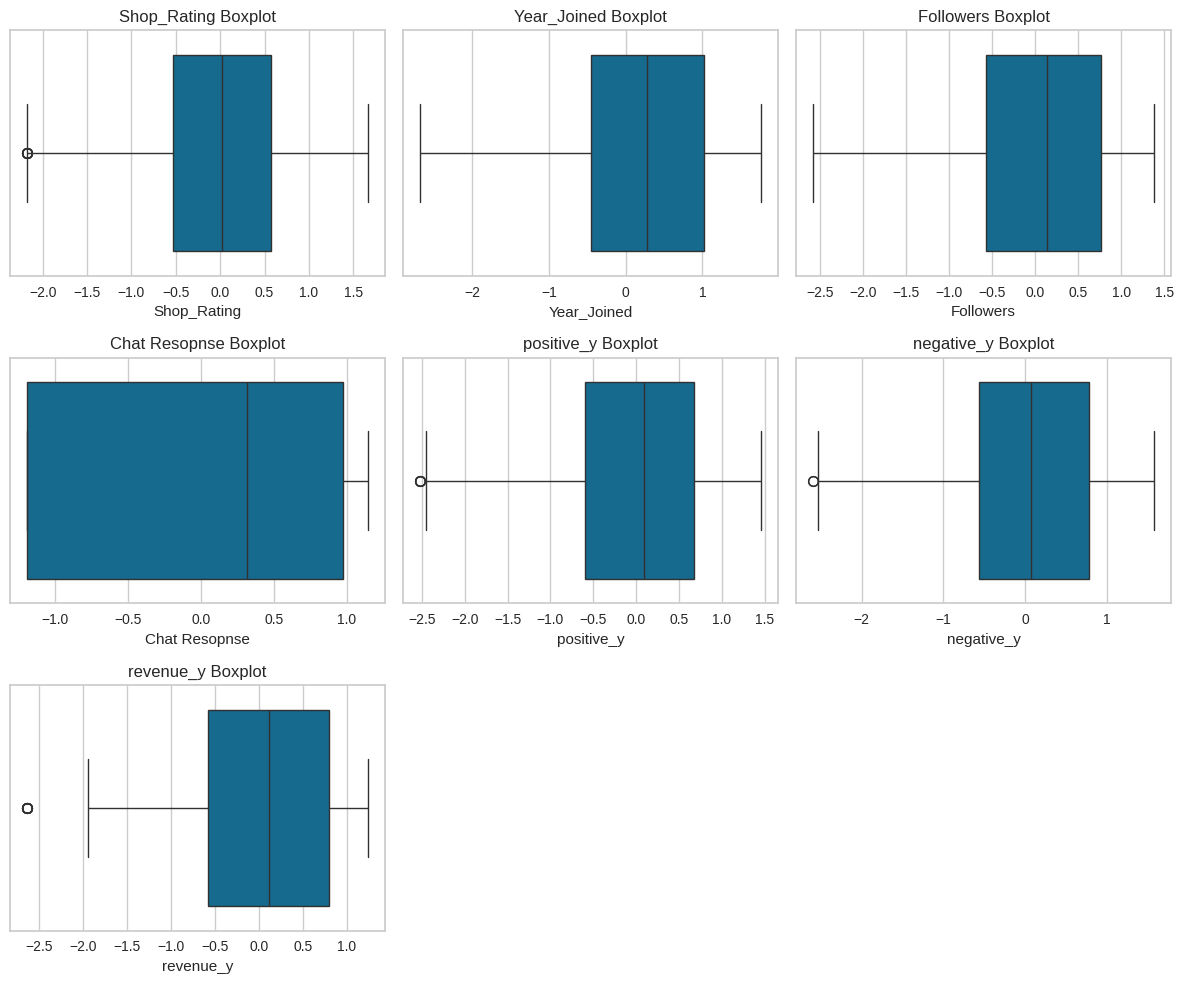

In [ ]:
# Visualize the boxplot of each variable.
plt.figure(figsize=(12,10))
for i, j in enumerate(scaled_df.columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=scaled_df[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()

plt.show()


In [ ]:

# Hàm để đưa outlier về max hoặc min
def handle_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Đưa outlier về giá trị max nếu nằm phía trên của boxplot
    column[column > upper_bound] = upper_bound

    # Đưa outlier về giá trị min nếu nằm phía dưới của boxplot
    column[column < lower_bound] = lower_bound

# Áp dụng hàm cho từng cột 'Cau1', 'Cau2', 'Cau3', 'Cau4'
for col in ['Shop_Rating',	'Year_Joined',	'Followers',	'Chat Resopnse',	'positive_y',	'negative_y',	'revenue_y']:
    handle_outliers(scaled_df[col])




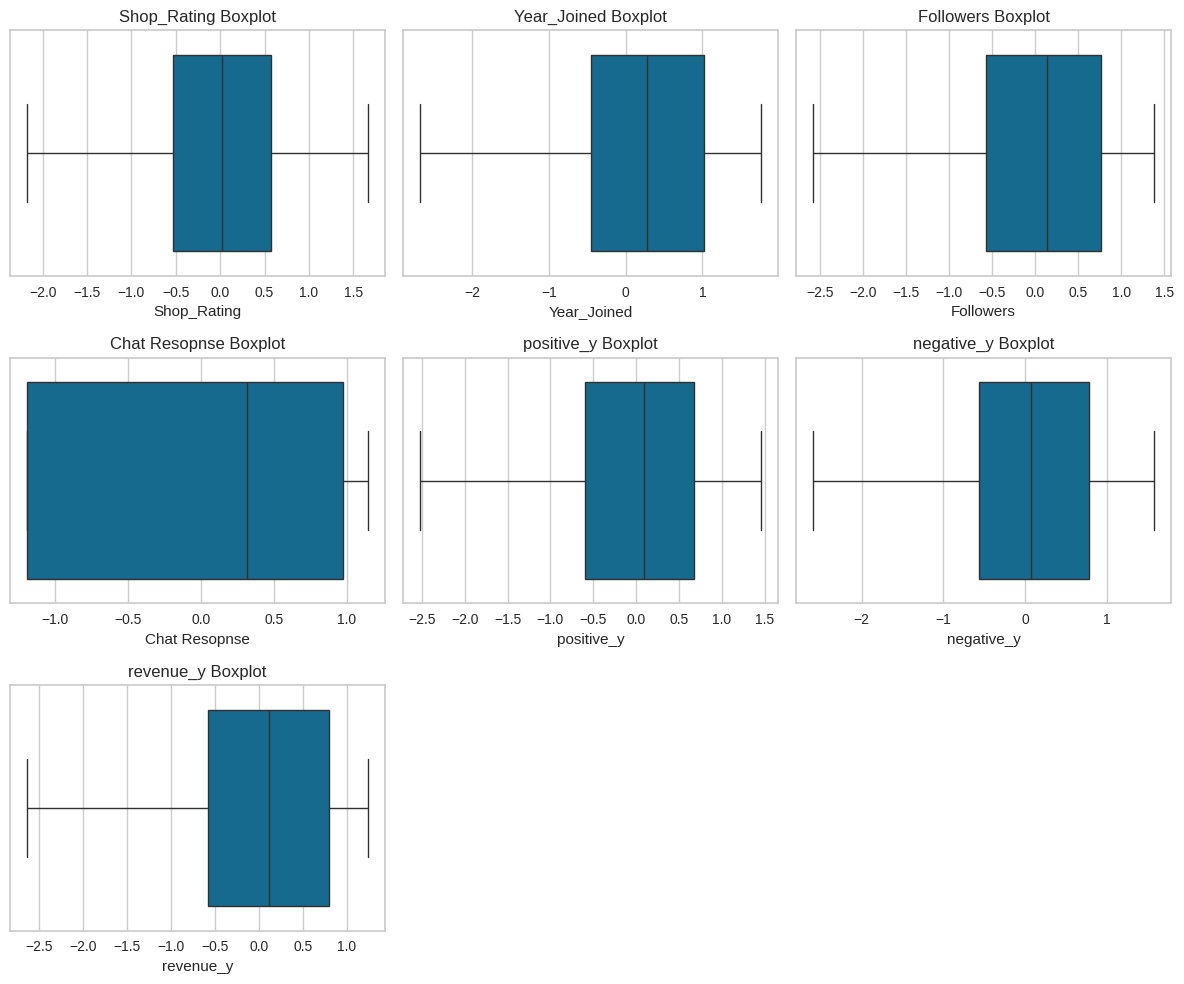

In [ ]:
# Visualize the boxplot of each variable.
plt.figure(figsize=(12,10))
for i, j in enumerate(scaled_df.columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=scaled_df[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()

plt.show()


# ***Multivariate Analysis***

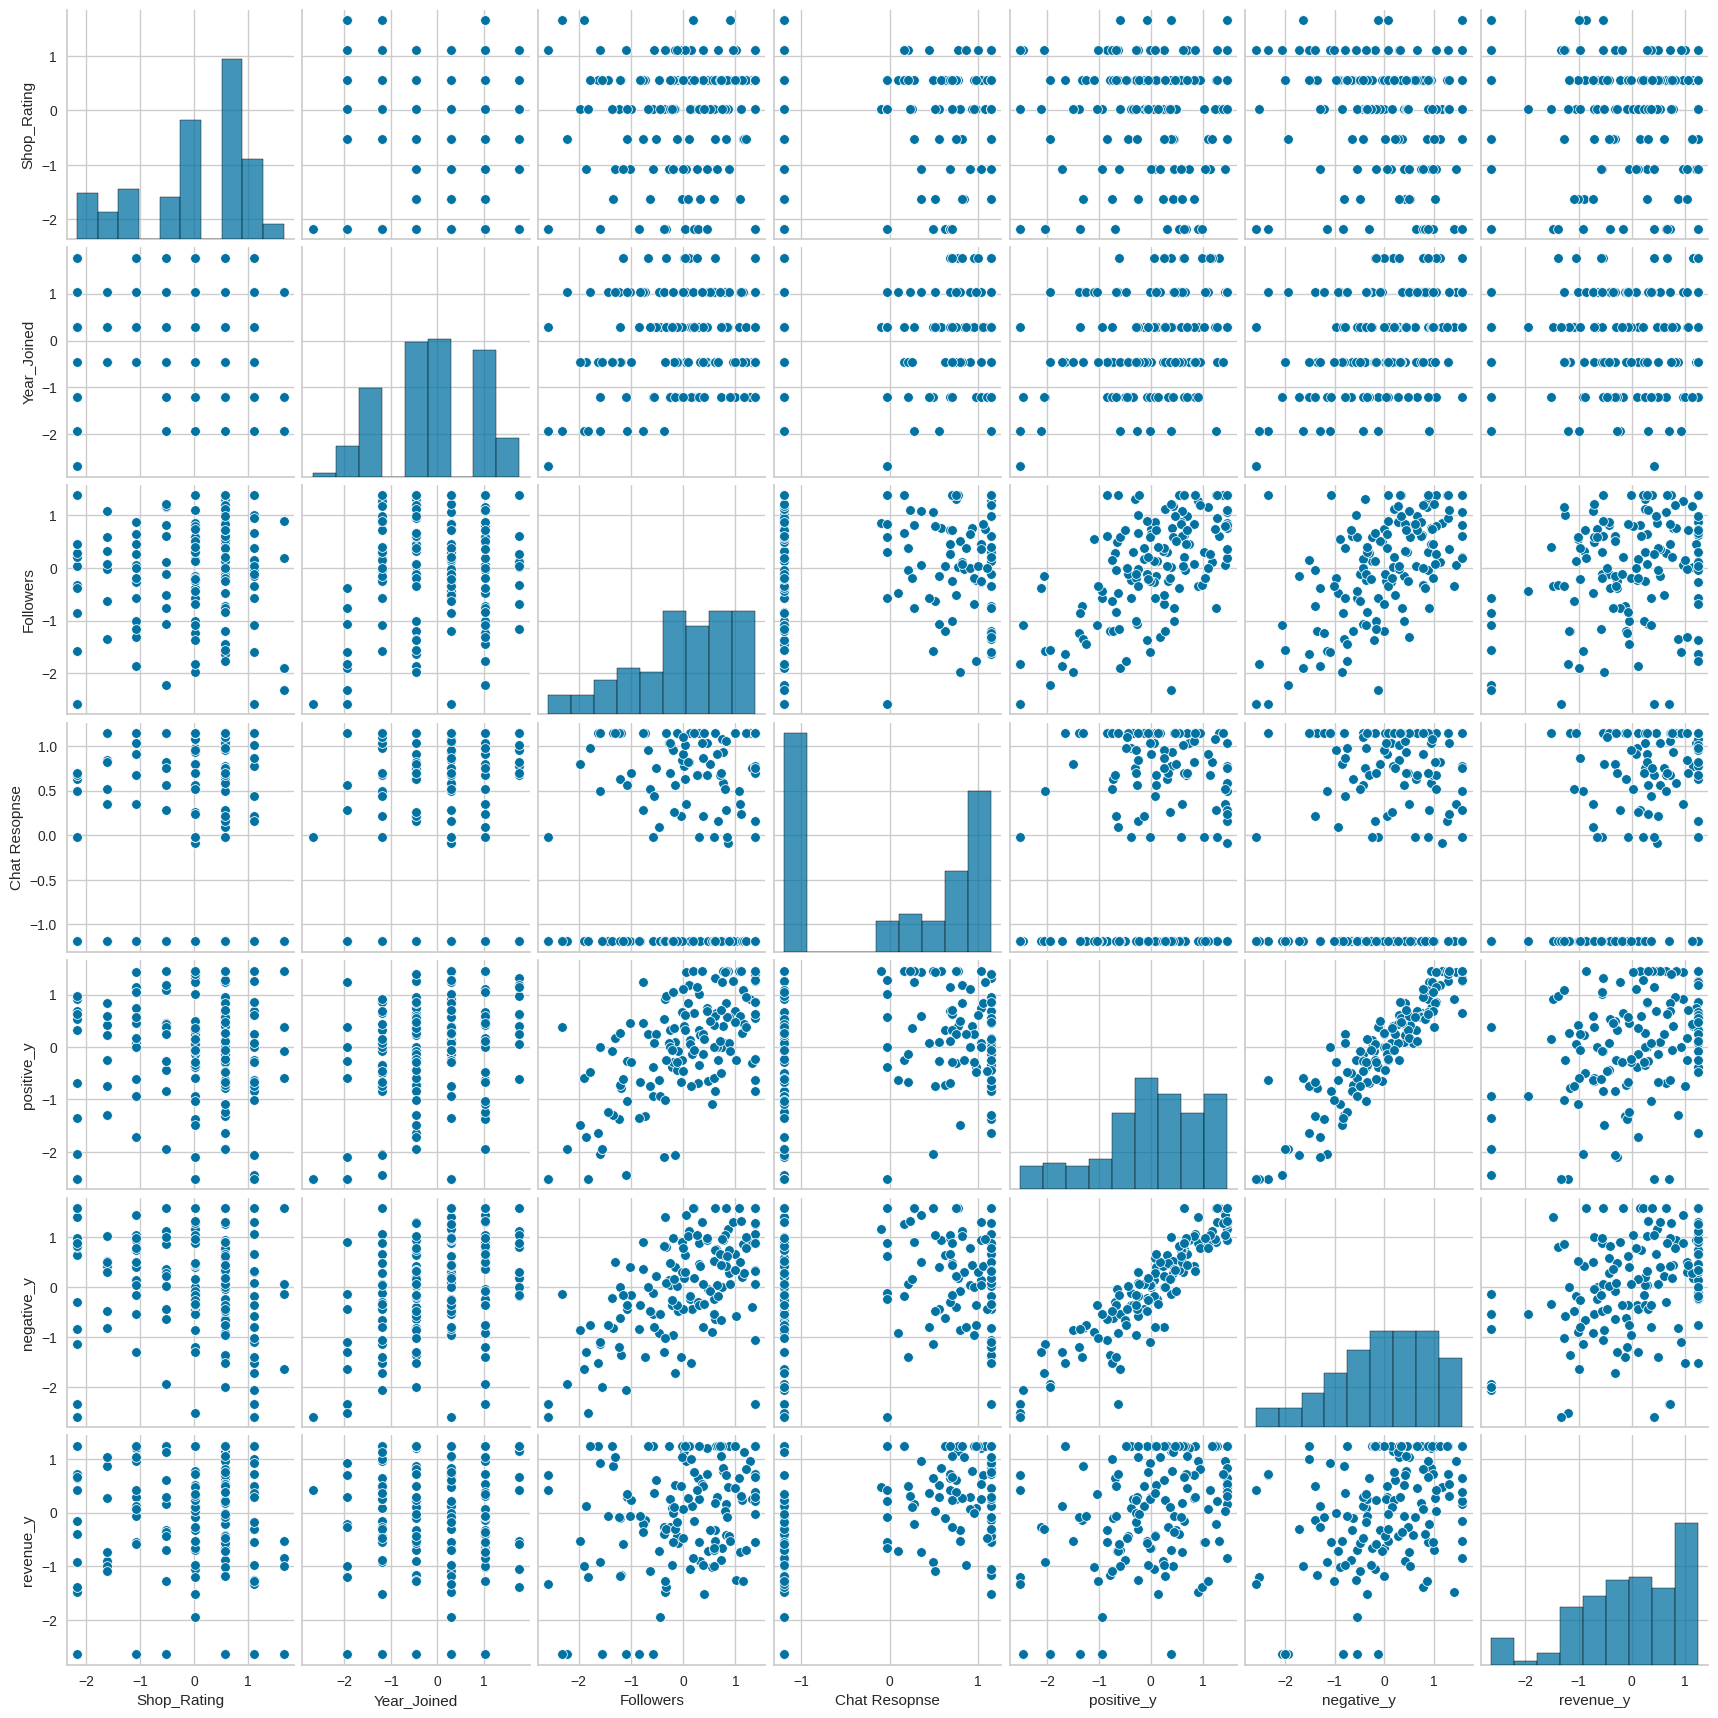

In [ ]:
sns.pairplot(scaled_df)

Hình pair plot (hay còn gọi là scatter plot matrix) là một công cụ hữu ích để hiển thị mối quan hệ giữa các biến số trong một tập dữ liệu. Trong hình pair plot này, mỗi cặp biến số trong tập dữ liệu được biểu diễn bằng một biểu đồ phân tán (scatter plot), và các biến số cũng được biểu diễn bằng biểu đồ histogram trên đường chéo chính.
Biểu đồ histogram trên đường chéo chính:

Mỗi ô trên đường chéo chính (từ trái sang phải) là một biểu đồ histogram của một biến số đơn lẻ.
Các histogram này cho ta biết phân phối của từng biến số. Ví dụ:
Shop_Rating chủ yếu tập trung từ 4 đến 5.
Year_Joined có sự tập trung ở những năm gần đây hơn.
Followers có một số giá trị cao nhưng đa số tập trung ở mức thấp.
Chat_Response tập trung ở mức cao (gần 1.0), cho thấy nhiều cửa hàng có tỉ lệ phản hồi tốt.
positive_yy và negative_yy có phân phối tập trung ở mức thấp nhưng có một số giá trị rất cao.
revenue_yy có một số giá trị rất cao nhưng phần lớn cũng tập trung ở mức thấp.
Biểu đồ phân tán (scatter plot):

Các ô không nằm trên đường chéo chính là các biểu đồ phân tán giữa các cặp biến số.
Những biểu đồ này cho ta thấy mối quan hệ giữa hai biến số bất kỳ. Ví dụ:
Shop_Rating và Followers: Có một số điểm dữ liệu cho thấy mối quan hệ giữa xếp hạng cửa hàng và số lượng người theo dõi.
Followers và revenue_yy: Có xu hướng tích cực, cho thấy rằng các cửa hàng có nhiều người theo dõi hơn thường có doanh thu cao hơn.
positive_yy và revenue_yy: Có mối quan hệ tích cực rõ ràng, cửa hàng nhận được nhiều đánh giá tích cực thường có doanh thu cao.
negative_yy và revenue_yy: Mối quan hệ ít rõ ràng hơn, nhưng có một số cửa hàng có doanh thu cao cũng nhận được đánh giá tiêu cực cao.
Year_Joined và Followers: Cửa hàng tham gia lâu hơn thường có nhiều người theo dõi hơn.
Nhìn chung, pair plot này giúp ta hình dung mối quan hệ giữa các biến số trong tập dữ liệu và có thể giúp xác định những biến số có liên quan chặt chẽ đến nhau. Điều này rất hữu ích trong việc phân tích dữ liệu và xây dựng các mô hình dự đoán.

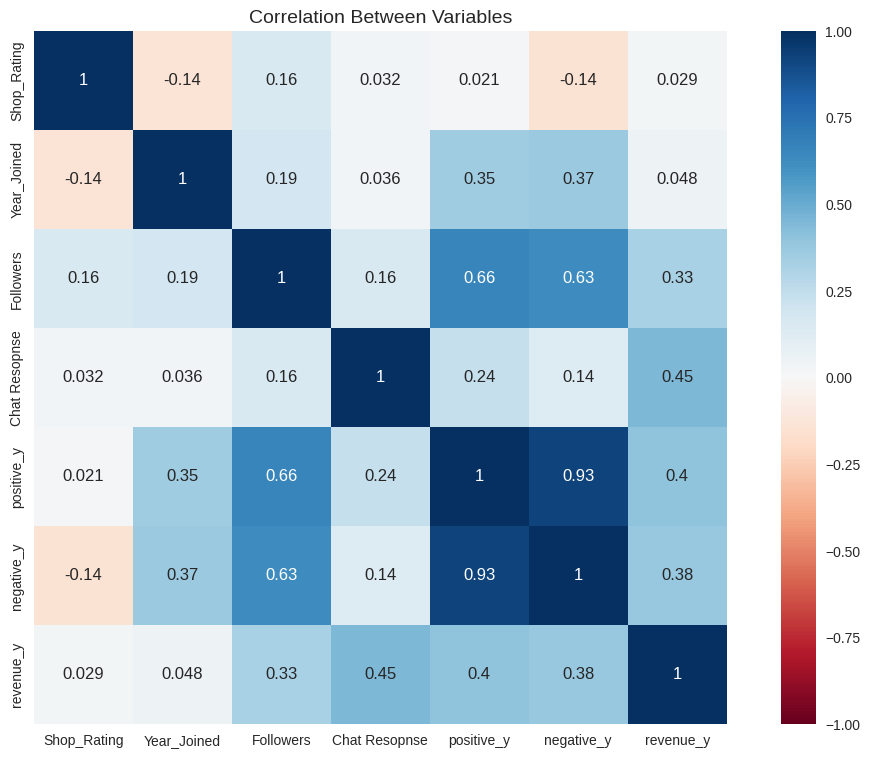

In [ ]:
correlation_metrics=scaled_df.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()

# ***`Elbow`***

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

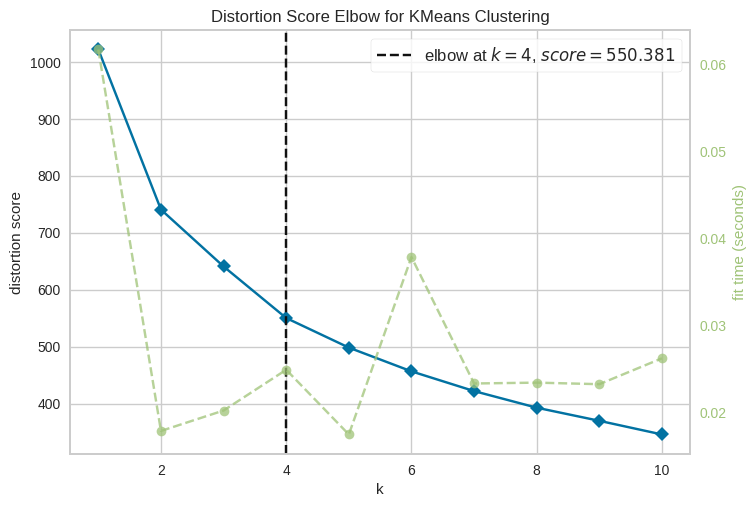

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))  # Try different values of K
visualizer.fit(scaled_df)
visualizer.show()

# ***`Silhouette`***

Average Silhouette Score for 2 clusters: 0.24359063966436809
Average Silhouette Score for 3 clusters: 0.18401020398502466
Average Silhouette Score for 4 clusters: 0.20189936081856316
Average Silhouette Score for 5 clusters: 0.2045693612117724
Average Silhouette Score for 6 clusters: 0.1932325596682842
Average Silhouette Score for 7 clusters: 0.1969269047471801
Average Silhouette Score for 8 clusters: 0.19799826850070656
Average Silhouette Score for 9 clusters: 0.19162884960402357
Average Silhouette Score for 10 clusters: 0.19677388549168373
Average Silhouette Score for 11 clusters: 0.19796870755702883


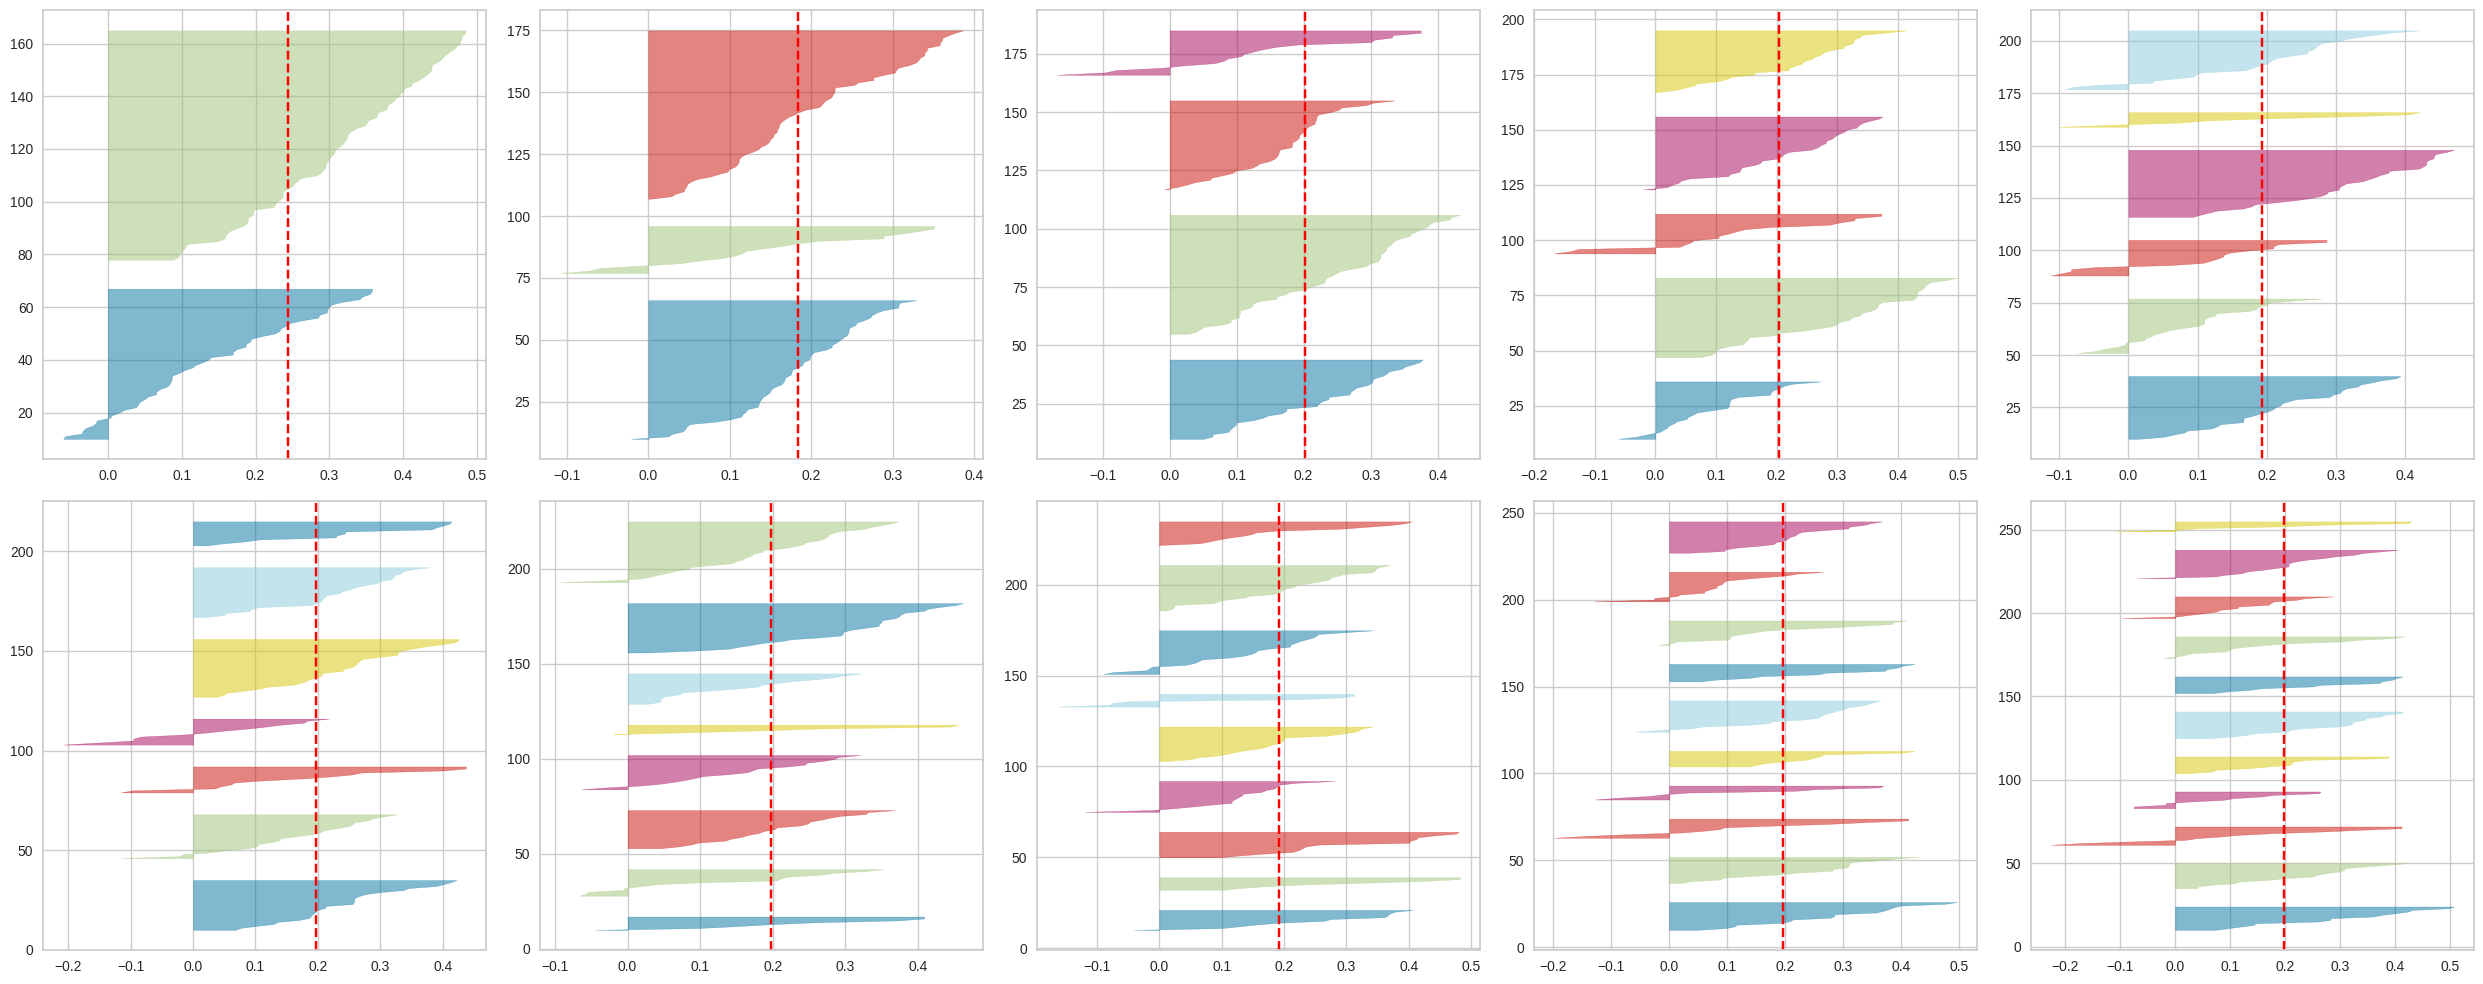

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler

# Giả sử scaled_df là DataFrame đã được chuẩn hóa
# scaled_df = scaler.fit_transform(df)  # ví dụ chuẩn hóa dữ liệu

fig, ax = plt.subplots(2, 5, figsize=(25, 10))

for i in range(2, 12):  # Từ 2 đến 11 cụm
    km = KMeans(n_clusters=i, init='random', n_init='auto', random_state=42)
    row, col = divmod(i-2, 5)
    visualizer_sil = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row][col])
    visualizer_sil.fit(scaled_df)
    silhouette_avg = visualizer_sil.silhouette_score_
    print(f"Average Silhouette Score for {i} clusters: {silhouette_avg}")

plt.tight_layout()
plt.show()


# ***`Hierarchical`***

In [ ]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
hier_clustering = AgglomerativeClustering(n_clusters=5)
hier_labels = hier_clustering.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Gán nhãn phân cụm vào DataFrame
df_copy_temp['Hierarchical Cluster'] = hier_labels
df_copy_temp['KMeans Cluster'] = kmeans_labels

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_copy_temp.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shop_categories,Name_Shop,Shop_Rating,Year_Joined,Followers,Chat Resopnse,positive_y,negative_y,revenue_y,Hierarchical Cluster,KMeans Cluster
0,Thể Thao - Dã Ngoại,SUNUGY SNG,4.7,6,446.0,1.00,105.0,30,11104000,1,4
1,"Làm Đẹp - Sức Khỏe, Đồ Chơi - Mẹ & Bé",Fobelife Shop,4.7,6,3359.0,0.00,378.0,188,6290000,3,3
2,"Nhà Cửa - Đời Sống, Balo và Vali, Đồ Chơi - Mẹ...",TIẾN PHÁT STORE,4.6,3,545.0,0.50,246.0,99,174719625,1,4
3,Làm Đẹp - Sức Khỏe,PH PUHA Official,4.7,4,242.0,1.00,171.0,31,1412000,1,4
4,"Laptop - Máy Vi Tính - Linh kiện, Máy Ảnh - Má...",Lưu Trữ Sài Gòn,4.7,7,1181.0,0.84,500.0,130,144060000,1,1


# ***`Frequent Itemset`***

In [ ]:
transactions = df_copy_temp.apply(lambda row: [f'{col}={val}' for col, val in row.items() if col != 'Name_Shop' and col != 'shop_categories'], axis=1).tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_fpgrowth = pd.DataFrame(te_ary, columns=te.columns_)

# Áp dụng FP-Growth để tìm tập mục phổ biến
frequent_itemsets = fpgrowth(df_fpgrowth, min_support=0.2, use_colnames=True)

print(frequent_itemsets)

     support                                    itemsets
0   0.321918                           (Shop_Rating=4.7)
1   0.315068                    (Hierarchical Cluster=1)
2   0.232877                          (KMeans Cluster=4)
3   0.226027                             (Year_Joined=6)
4   0.390411                         (Chat Resopnse=0.0)
5   0.212329                          (KMeans Cluster=3)
6   0.212329                           (Shop_Rating=4.6)
7   0.239726                             (Year_Joined=4)
8   0.260274                          (KMeans Cluster=1)
9   0.246575                             (Year_Joined=5)
10  0.226027                    (Hierarchical Cluster=4)
11  0.226027  (Hierarchical Cluster=1, KMeans Cluster=4)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Phân tích các cụm
for cluster in df_copy_temp['KMeans Cluster'].unique():
    cluster_data = df_copy_temp[df_copy_temp['KMeans Cluster'] == cluster]
    print(f'Cluster {cluster}:\n{cluster_data.describe()}\n')

# Phân tích các tập mục phổ biến
print(frequent_itemsets)


Cluster 4:
       Shop_Rating  Year_Joined    Followers  Chat Resopnse   positive_y  \
count    34.000000    34.000000    34.000000      34.000000    34.000000   
mean      4.673529     3.882353  1388.433824       0.872059   281.029412   
std       0.110943     1.148509  1831.859584       0.158512   176.959931   
min       4.300000     2.000000    85.000000       0.500000    78.000000   
25%       4.600000     3.000000   289.000000       0.787500   182.500000   
50%       4.700000     4.000000   847.000000       0.940000   260.500000   
75%       4.775000     4.750000  1491.500000       1.000000   328.500000   
max       4.800000     6.000000  6995.875000       1.000000  1085.000000   

       negative_y     revenue_y  Hierarchical Cluster  KMeans Cluster  
count   34.000000  3.400000e+01             34.000000            34.0  
mean    77.205882  4.391026e+07              0.970588             4.0  
std     48.727927  5.519835e+07              0.171499             0.0  
min     12.00000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# ***`K-Means`***

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df_copy_temp['cluster'] = kmeans.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


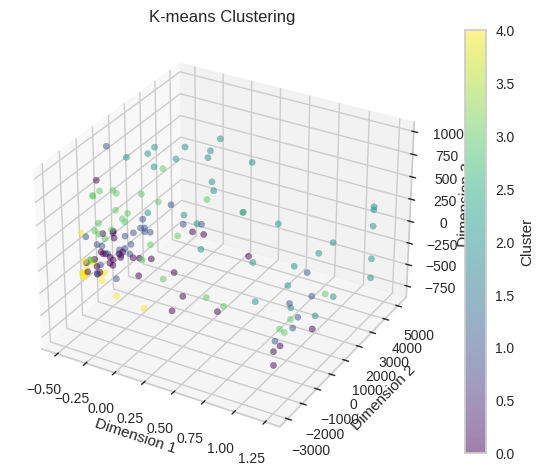

In [ ]:
# Assuming filtered_df is your DataFrame
pca = PCA(n_components=3)
features_pca = pca.fit_transform(df_copy_temp.iloc[ : , 2: ])

# Plot the clustered data using the first three principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], c = df_copy_temp['cluster'], cmap='viridis', alpha=0.5)

# Add labels and title
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.title('K-means Clustering')

# Add colorbar
fig.colorbar(scatter, ax=ax, label='Cluster')

plt.show()


In [ ]:
    df_copy_temp.cluster.value_counts(ascending=True)

cluster
4    18
1    29
3    31
2    32
0    36
Name: count, dtype: int64

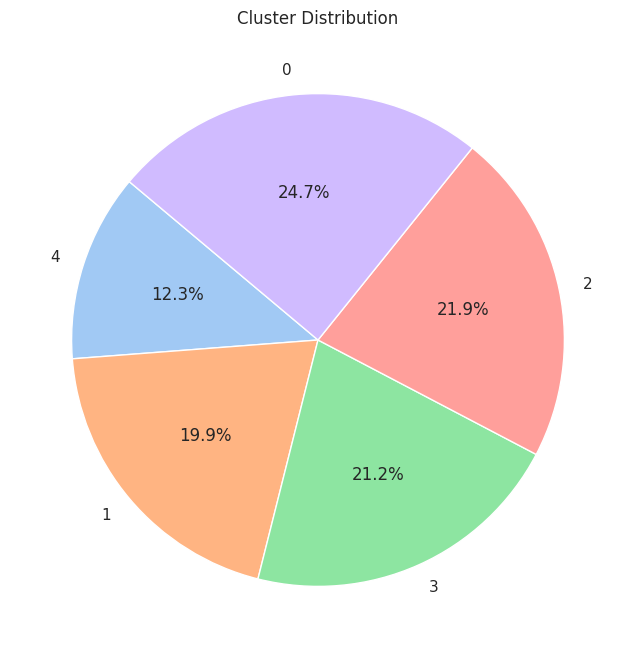

In [ ]:
cluster_counts = df_copy_temp.cluster.value_counts(ascending=True)
# Thiết lập phong cách cho Seaborn
sns.set(style="whitegrid")

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Cluster Distribution')
plt.show()

# ***Analyze clusters***

In [ ]:
filtered_rows_0 = df_copy_temp[df_copy_temp['cluster'] == 0]
filtered_rows_1 = df_copy_temp[df_copy_temp['cluster'] == 1]
filtered_rows_2 = df_copy_temp[df_copy_temp['cluster'] == 2]
filtered_rows_3 = df_copy_temp[df_copy_temp['cluster'] == 3]
filtered_rows_4 = df_copy_temp[df_copy_temp['cluster'] == 4]

print(filtered_rows_0.describe())
print(filtered_rows_1.describe())
print(filtered_rows_2.describe())
print(filtered_rows_3.describe())
print(filtered_rows_4.describe())




       Shop_Rating  Year_Joined    Followers  Chat Resopnse   positive_y  \
count    36.000000    36.000000    36.000000      36.000000    36.000000   
mean      4.672222     3.972222  1354.909722       0.859722   281.416667   
std       0.108525     1.182881  1784.691716       0.164082   173.238791   
min       4.300000     2.000000    85.000000       0.500000    78.000000   
25%       4.600000     3.000000   303.000000       0.750000   187.500000   
50%       4.700000     4.000000   847.000000       0.930000   260.500000   
75%       4.725000     5.000000  1454.500000       1.000000   337.250000   
max       4.800000     6.000000  6995.875000       1.000000  1085.000000   

       negative_y     revenue_y  cluster  
count   36.000000  3.600000e+01     36.0  
mean    78.666667  4.271833e+07      0.0  
std     49.582831  5.402065e+07      0.0  
min     12.000000  7.150000e+05      0.0  
25%     44.000000  8.333740e+06      0.0  
50%     74.000000  2.073550e+07      0.0  
75%    102.500

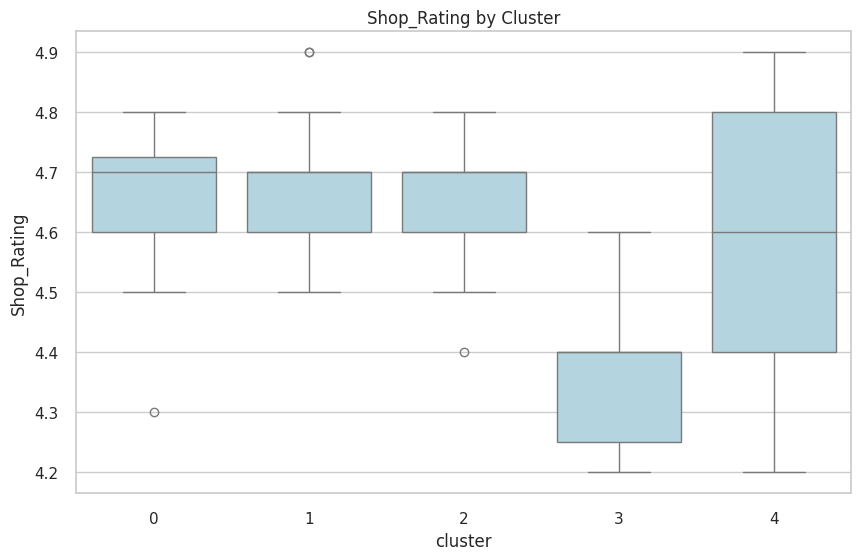

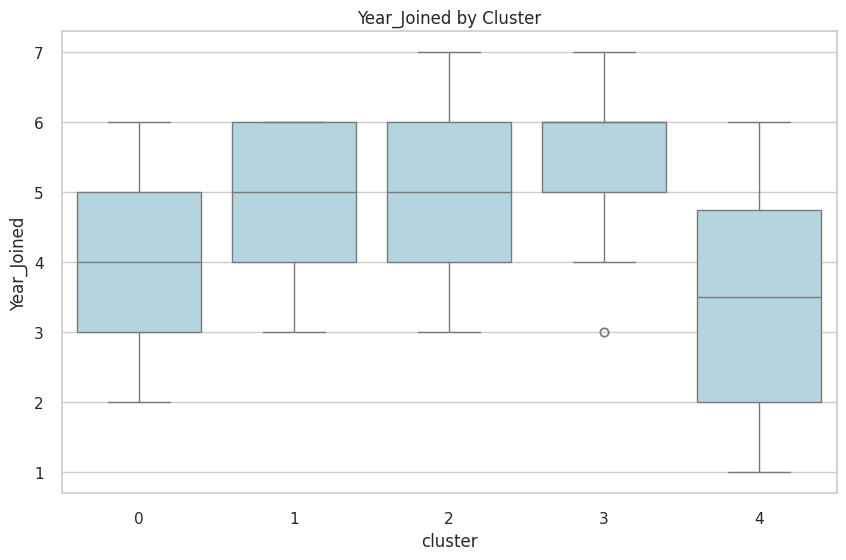

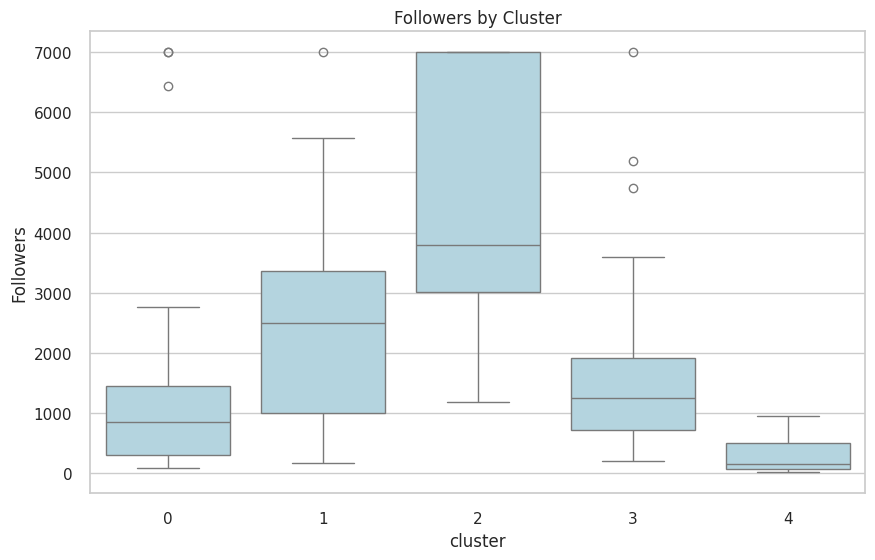

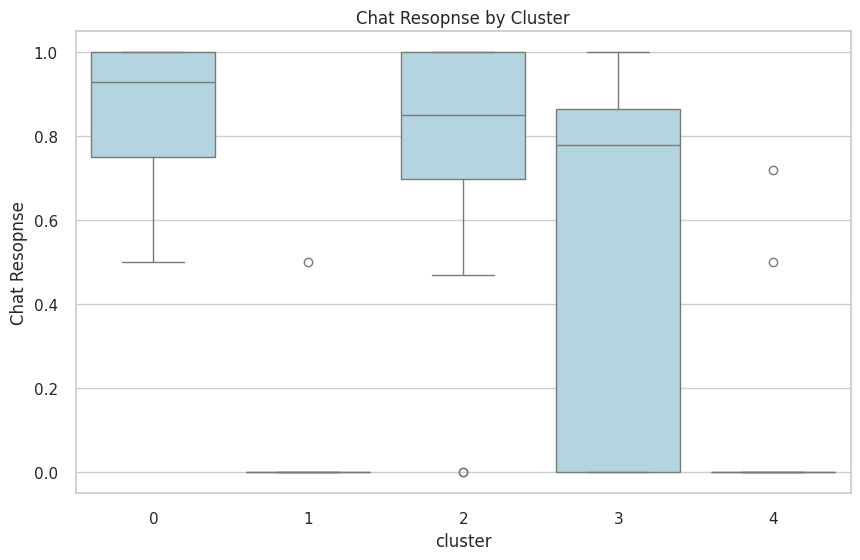

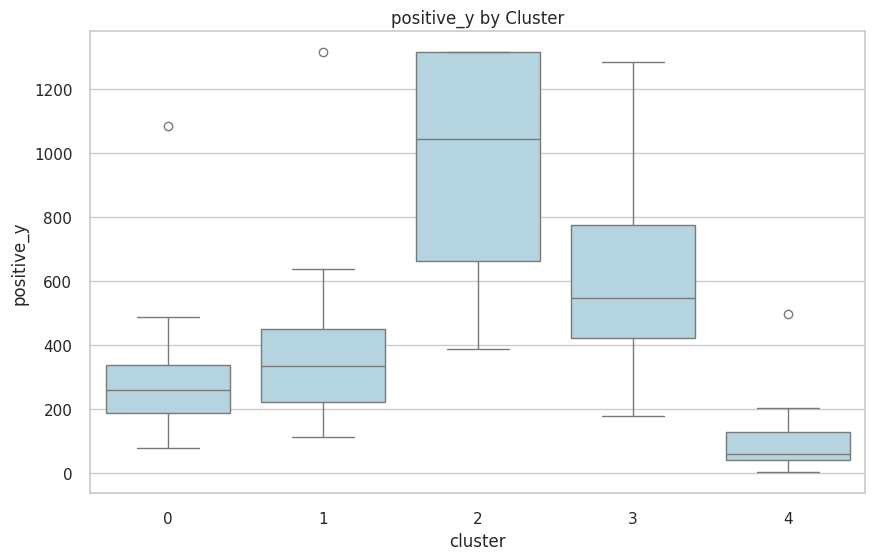

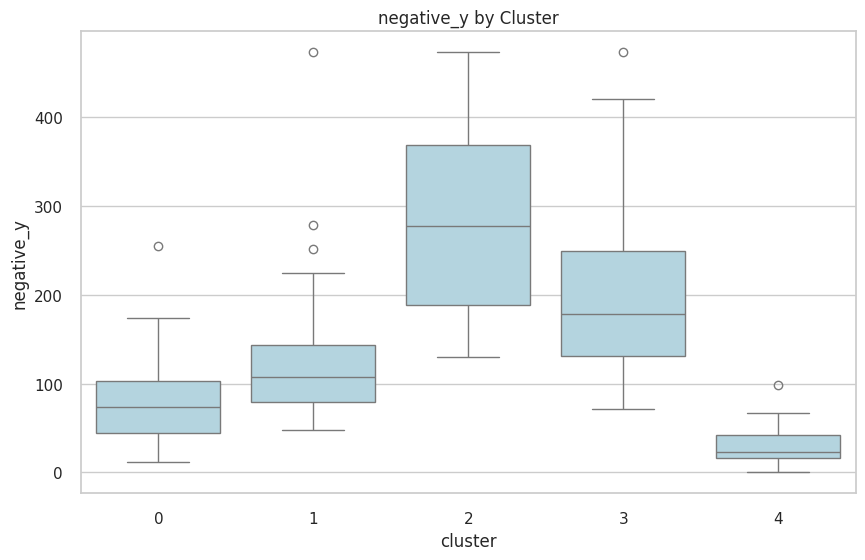

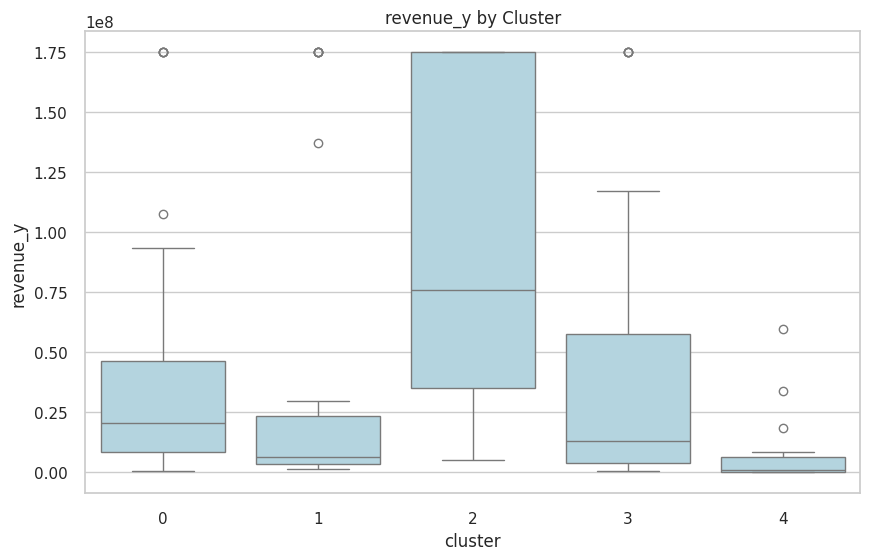

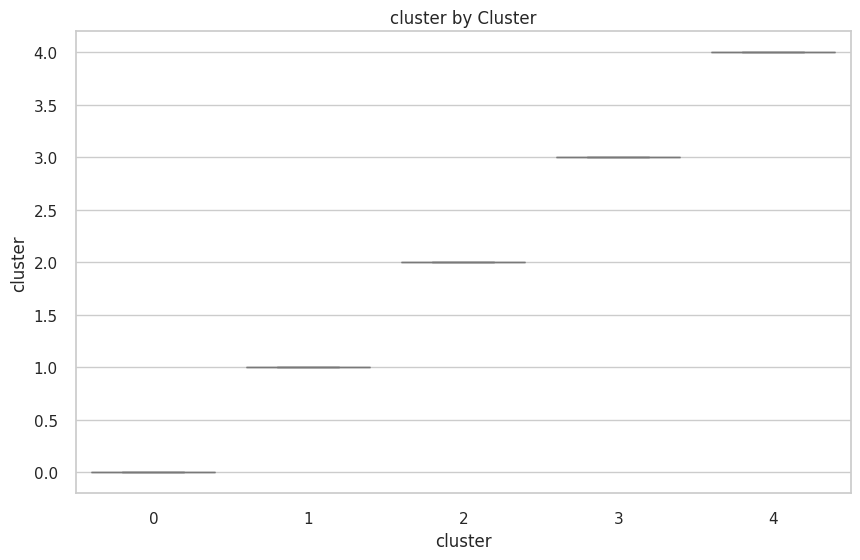

In [ ]:


for var in df_copy_temp.describe().columns:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='cluster', y=var, data=df_copy_temp, color='lightblue')
  plt.title(f'{var} by Cluster')
  plt.show()


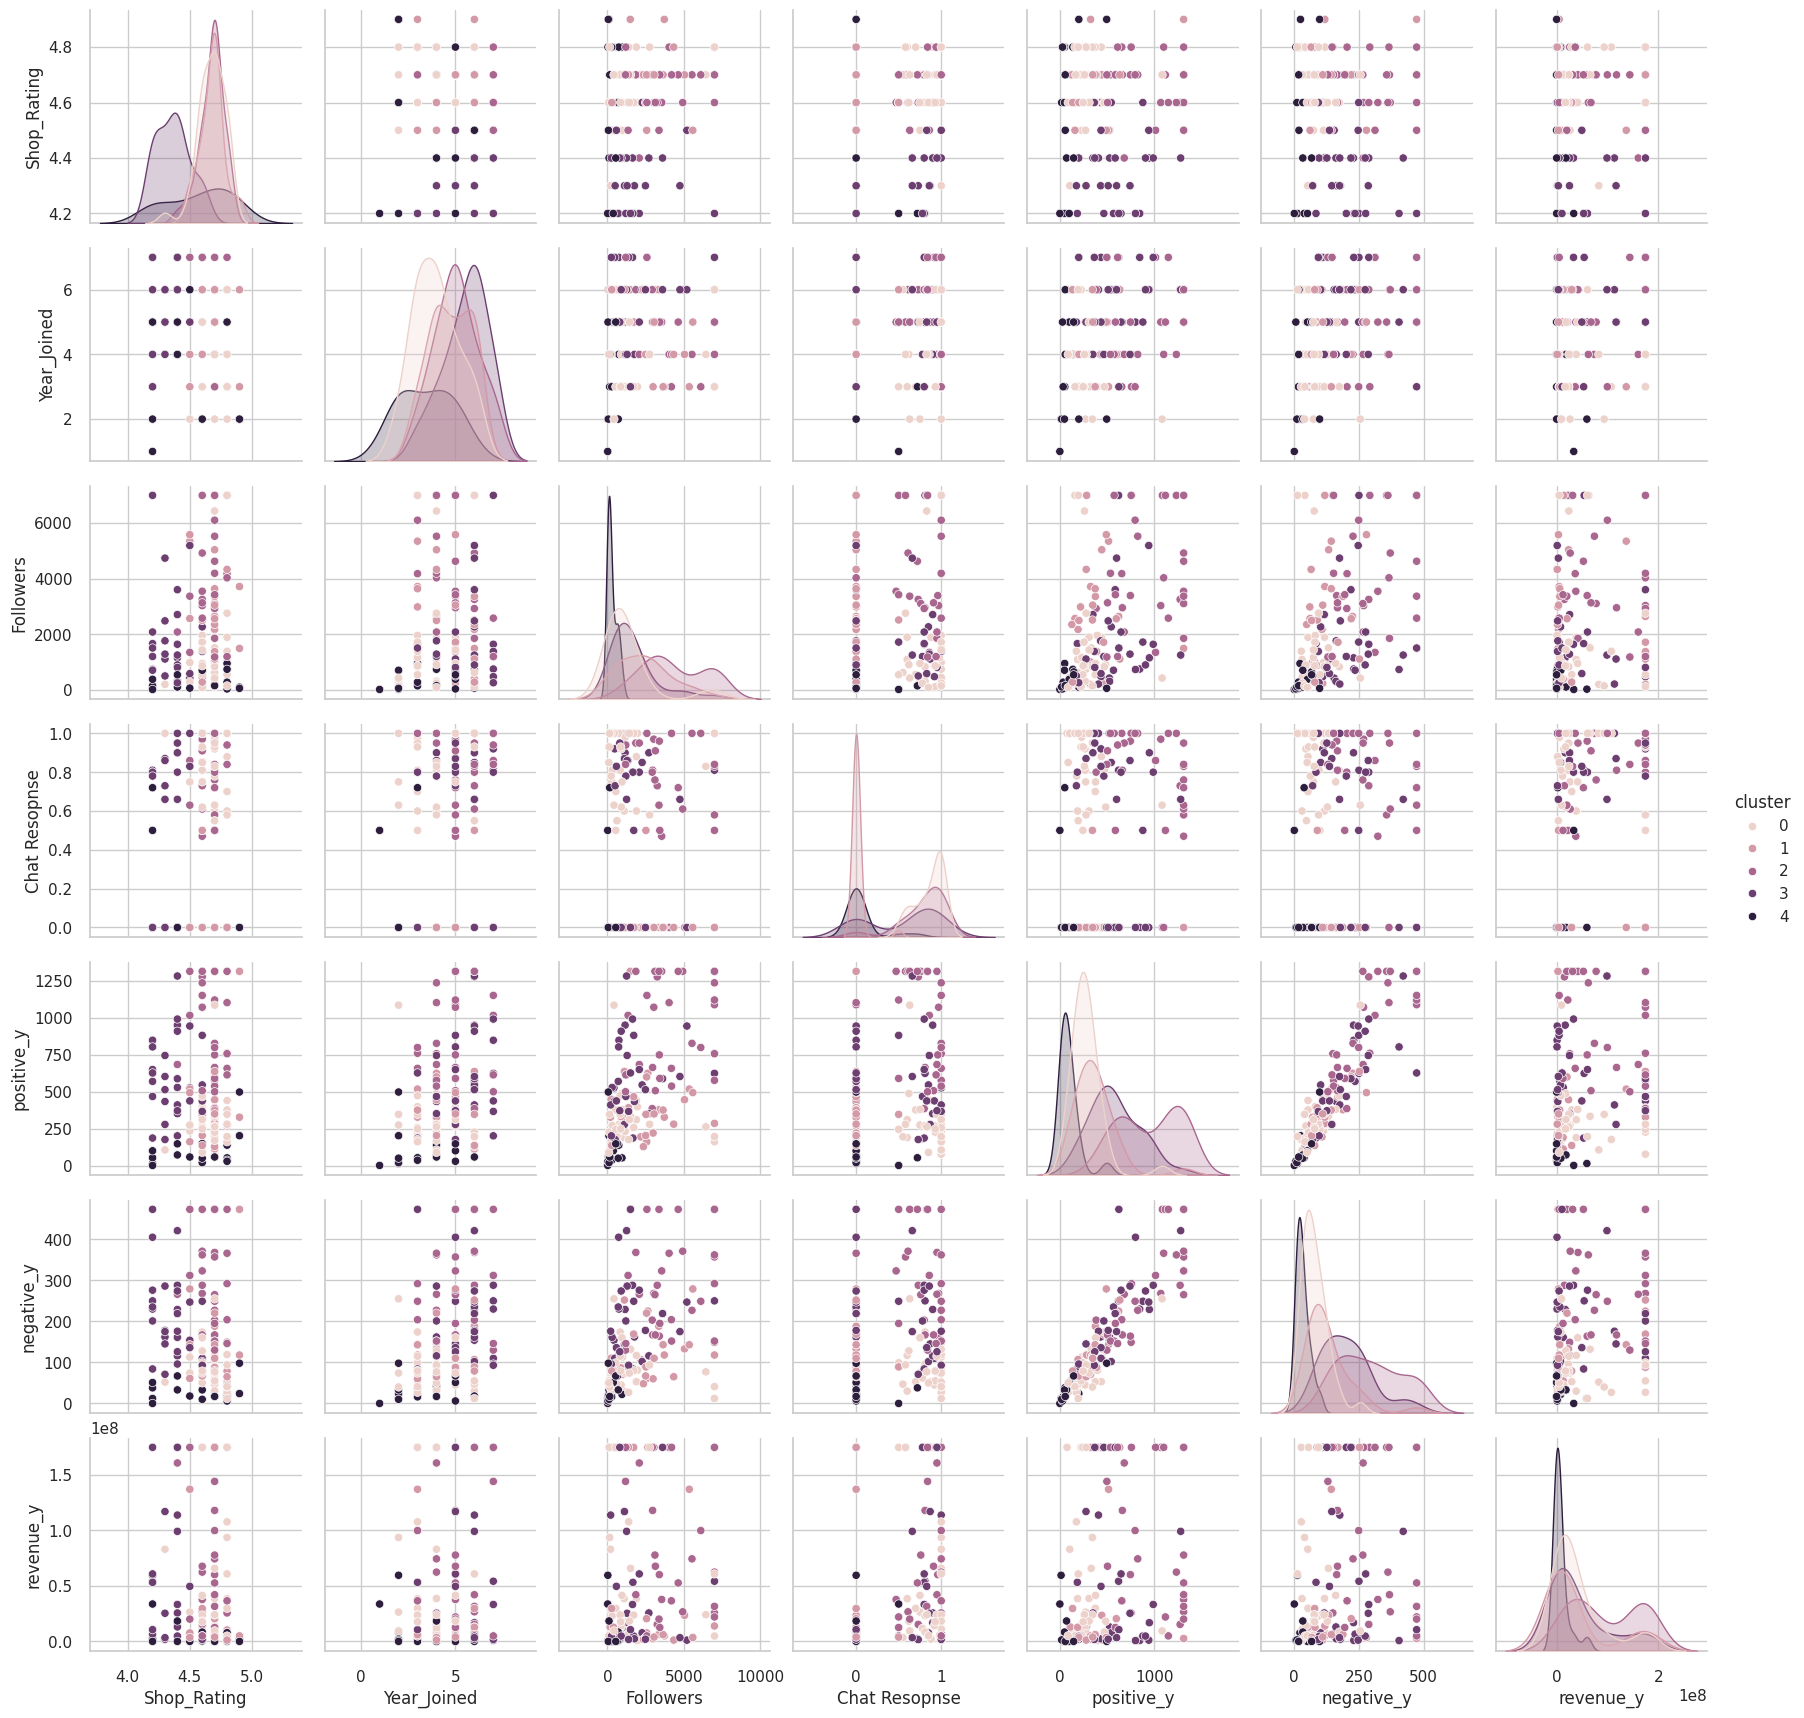

In [ ]:
# Vẽ biểu đồ phân tán cho các biến để xem mối quan hệ giữa chúng theo cụm
sns.pairplot(df_copy_temp, hue='cluster', vars=['Shop_Rating', 'Year_Joined', 'Followers', 'Chat Resopnse', 'positive_y', 'negative_y', 'revenue_y'])
plt.show()


In [ ]:
# Tổng hợp và so sánh các đặc điểm chính của từng cụm
for col in df_copy_temp.columns[:-1]:  # Exclude the 'cluster' column
    print(f"\nStatistics for {col}:")
    print(df_copy_temp.groupby('cluster')[col].describe())


Statistics for shop_categories:
        count unique                        top freq
cluster                                             
0          36     19  Thiết Bị Số - Phụ Kiện Số    8
1          29     16         Làm Đẹp - Sức Khỏe   13
2          32     21         Làm Đẹp - Sức Khỏe    8
3          31     19  Thiết Bị Số - Phụ Kiện Số    5
4          18     14        Thể Thao - Dã Ngoại    4

Statistics for Name_Shop:
        count unique                         top freq
cluster                                              
0          36     36               Vạn Tín Store    1
1          29     29                    JM STORE    1
2          32     32  Gian hàng Durex chính hãng    1
3          31     31         HXSJ Official Store    1
4          18     17     GUANG YU Official Store    2

Statistics for Shop_Rating:
         count      mean       std  min   25%  50%    75%  max
cluster                                                       
0         36.0  4.672222  0.108525  

In [ ]:
df_copy_temp.to_excel('/content/drive/My Drive/Colab Notebooks/nhap3.xlsx')

# ***`Analysys`***

In [ ]:
df_copy_temp = pd.read_excel('/content/drive/My Drive/Colab Notebooks/nhap3.xlsx')

In [ ]:
filtered_rows_0 = df_copy_temp[df_copy_temp['cluster'] == 0]
filtered_rows_1 = df_copy_temp[df_copy_temp['cluster'] == 1]
filtered_rows_2 = df_copy_temp[df_copy_temp['cluster'] == 2]
filtered_rows_3 = df_copy_temp[df_copy_temp['cluster'] == 3]
filtered_rows_4 = df_copy_temp[df_copy_temp['cluster'] == 4]
# print(filtered_rows_0.describe())
# print(filtered_rows_1.describe())
# print(filtered_rows_2.describe())
# print(filtered_rows_3.describe())
# print(filtered_rows_4.describe())



# ***One-hot encoding***

In [ ]:
unique_values = ', '.join(filtered_rows_4['shop_categories'].values.tolist()).split(', ')
# creating new column for each value in unique_values
for number in unique_values:
    filtered_rows_4[f'{number}'] = 0
for idx, row in filtered_rows_4.iterrows():
    for number in row['shop_categories'].split(', '):
        filtered_rows_4.loc[idx, f'{number}'] = 1
filtered_rows_4.drop(columns=['shop_categories'], inplace=True)

<ipython-input-121-d841081610df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rows_4[f'{number}'] = 0
<ipython-input-121-d841081610df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rows_4[f'{number}'] = 0
<ipython-input-121-d841081610df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [ ]:
filtered_rows_4.iloc[: , 10:].head()

,Thể Thao - Dã Ngoại,Ô Tô - Xe Máy - Xe Đạp,Nhà Cửa - Đời Sống,Đồ Chơi - Mẹ & Bé,Làm Đẹp - Sức Khỏe,Điện Gia Dụng,Thiết Bị Số - Phụ Kiện Số,Máy Ảnh - Máy Quay Phim,Bách Hóa Online,Nhà Sách Tiki,Laptop - Máy Vi Tính - Linh kiện,Thời Trang Cho Mẹ Và Bé,Balo và Vali,Chăm sóc nhà cửa
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0
33,1,0,0,0,0,0,0,0,0,0,0,0,0,0
38,0,1,1,1,1,1,1,0,0,0,0,0,0,0
47,1,0,0,1,1,1,1,1,0,0,0,0,0,0
63,0,0,0,0,1,0,0,0,0,0,0,0,0,0


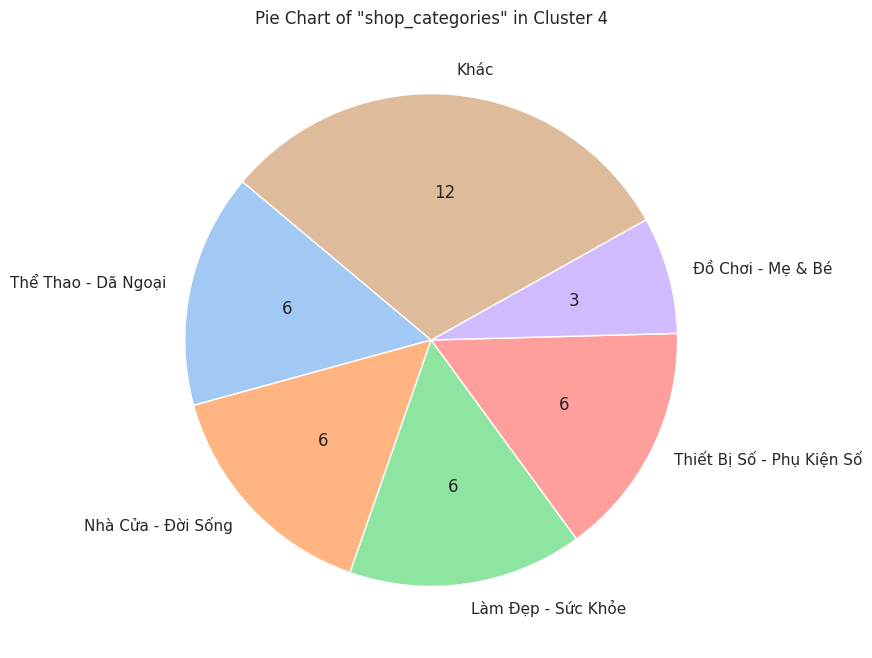

In [ ]:
column_sums = filtered_rows_4.iloc[: , 10:].sum()

# Sắp xếp các cột theo tổng dữ liệu giảm dần
sorted_columns = column_sums.sort_values(ascending=False)
sorted_column_names = sorted_columns.index.tolist()
sorted_column_names


# Bước 4: Vẽ biểu đồ Pie chart cho 5 giá trị lớn nhất, các giá trị còn lại cộng dồn lại và để ở pie tên "Khác"
top_5_values = sorted_columns[:5]
other_values_sum = sorted_columns[5:].sum()

# Tạo dữ liệu cho biểu đồ Pie chart
pie_data = pd.concat([top_5_values, pd.Series(other_values_sum, index=['Khác'])])
# Hàm định dạng để hiển thị số lượng
def func(pct, allvalues):
    absolute = int(np.round(pct/100.*np.sum(allvalues)))
    return f"{absolute}"

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(pie_data, labels=pie_data.index, autopct=lambda pct: func(pct, pie_data), startangle=140, colors=sns.color_palette("pastel"))
plt.title('Pie Chart of "shop_categories" in Cluster 4')
plt.show()

# ***PCA***